In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log = "benchmark.log"

# Initialize variables
records = []
current_benchmark = ""
current_N = 0
current_R = 0
current_result = 0.0

In [3]:

# Process each line
for line in open(log, 'r'):
    line = line.strip()
    if 'Bechmarking' in line:
        current_benchmark = line.split()[1].strip(':')
    elif 'N =' in line:
        parts = line.split(',')
        current_N = int(parts[0].split('=')[1].strip())
        current_R = int(parts[1].split('=')[1].strip(':'))
    elif 'Result:' in line:
        current_result = float(line.split(':')[1].strip())
    elif 'N:' in line:
        t_val = float(re.search(r'<T>: (.*?) sec', line).group(1))
        b_val = float(re.search(r'B: (.*?) GB/sec', line).group(1))
        f_val = float(re.search(r'F: (.*?) FLOP/sec', line).group(1))
        record = {
            'Benchmark': current_benchmark,
            'N': current_N,
            'R': current_R,
            'Result': current_result,
            'Time (sec)': t_val,
            'Bandwidth (GB/sec)': b_val,
            'FLOP/sec': f_val
        }
        records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Deduplicate by N and R
df = df.drop_duplicates(subset=['N', 'R', 'Benchmark'])

# Display DataFrame
df

,Benchmark,N,R,Result,Time (sec),Bandwidth (GB/sec),FLOP/sec
0,dp1,1000000,1000,1000000.0,0.000004,1974.354,5.299866e+11
2,dp1,300000000,20,16777216.0,0.057298,39.009,1.047150e+10
4,dp2,1000000,1000,1000000.0,0.000001,6591.719,1.769451e+12
6,dp2,300000000,20,67108864.0,0.024240,92.211,2.475261e+10
8,dp3,1000000,1000,1000000.0,0.000031,237.220,6.367838e+10
10,dp3,300000000,20,300000000.0,0.012260,182.316,4.894011e+10
12,dp4,1000000,1000,300000000.0,0.185137,0.040,1.080283e+07
13,dp4,300000000,20,300000000.0,55.489740,0.040,1.081281e+07
14,dp5,1000000,1000,300000000.0,0.000113,65.945,1.770189e+10
15,dp5,300000000,20,300000000.0,0.090070,24.816,6.661522e+09


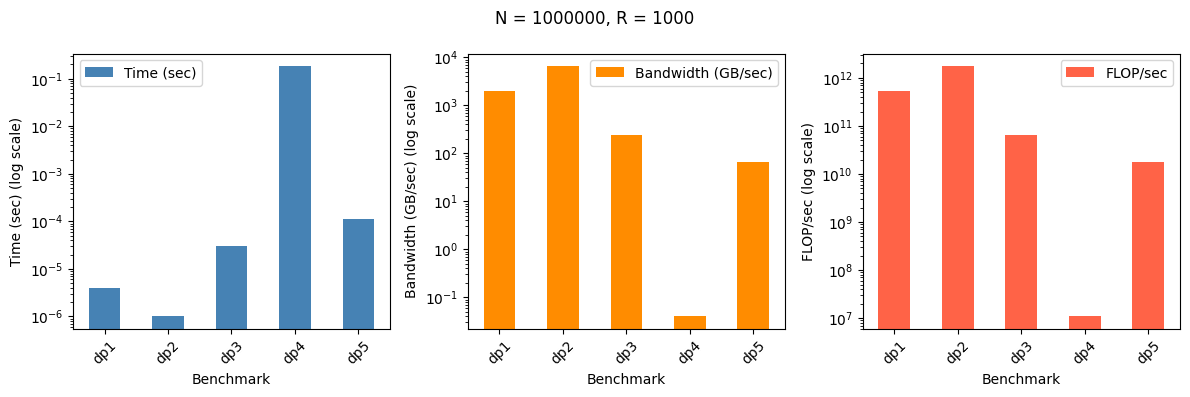

In [7]:
# visualize for benchmark
cols = ['Time (sec)', 'Bandwidth (GB/sec)', 'FLOP/sec']
colors = ["steelblue", "darkorange", "tomato"]

def vis(N, R):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for i, ax in enumerate(axs.flatten()):
        sub_df = df.query(f'N == {N} and R == {R}')
        sub_df.plot(x='Benchmark', y=cols[i], kind='bar', ax=ax, color=colors[i])
        ax.set_yscale('log')
        ax.set_ylabel(cols[i] + ' (log scale)')
        ax.set_xticklabels(sub_df['Benchmark'], rotation=45)
    plt.suptitle(f"N = {N}, R = {R}")
    plt.tight_layout()
    plt.show()

vis(1000000, 1000)

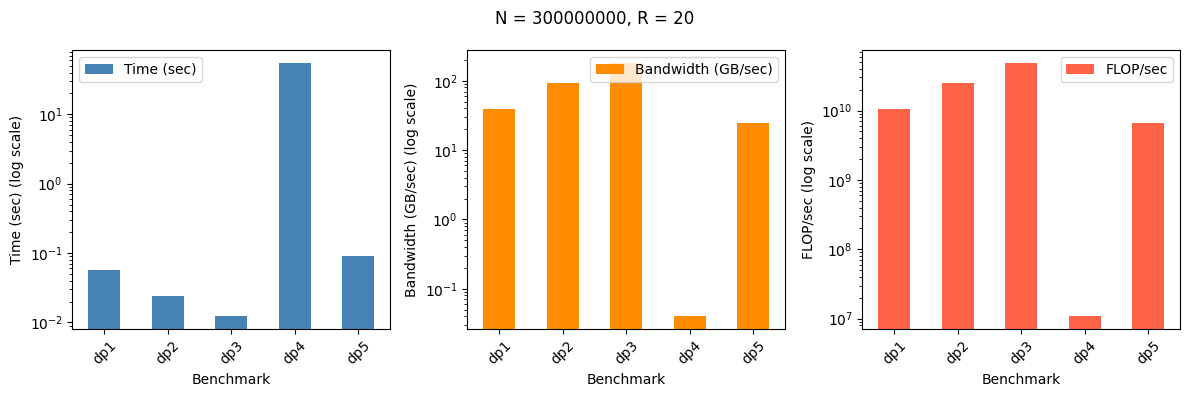

In [8]:
vis(300000000, 20)